In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import time
import hdbscan

from sklearn.metrics import silhouette_score

%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [2]:
plot_x, plot_y = 0, 5
n_clusters = 3
markers = []

In [3]:
s_id = 31825
input_path = r'local_data/cluster_%d.csv' % s_id
input_file = open(input_path,'rb')

In [4]:
reader=csv.reader(input_file)

In [5]:
data_array=list(reader)

In [6]:
input_file.close()

In [7]:
data=np.array(data_array).astype('float')

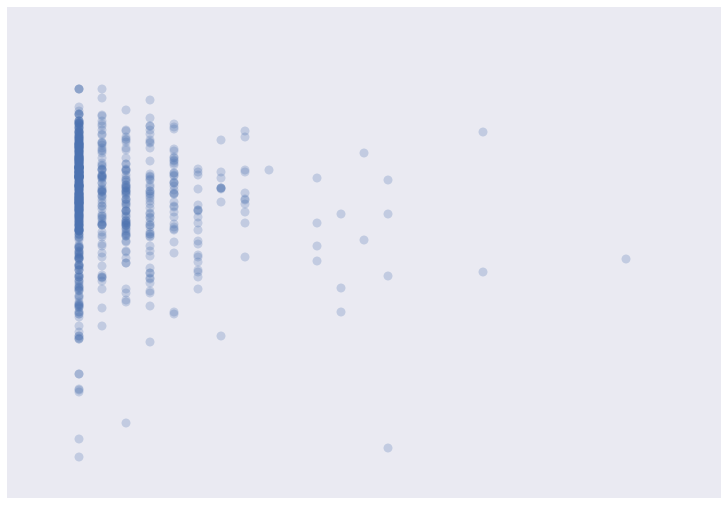

In [8]:
plt.scatter(data.T[plot_x], data.T[plot_y], c='b', **plot_kwds)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)

In [9]:
def plot_clusters(data, all_data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('deep', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    plt.scatter(all_data.T[plot_x], all_data.T[plot_y], c=colors, **plot_kwds)
    frame = plt.gca()
#     frame.axes.get_xaxis().set_visible(False)
#     frame.axes.get_yaxis().set_visible(False)
    plt.title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    plt.xlabel('mastery speed')
    plt.ylabel('reassessment performance')
    silhouette_avg = silhouette_score(data, labels)
    plt.text(3, 0.95, 'Silhouette Score: %4f'% silhouette_avg, fontsize=25)
    return labels

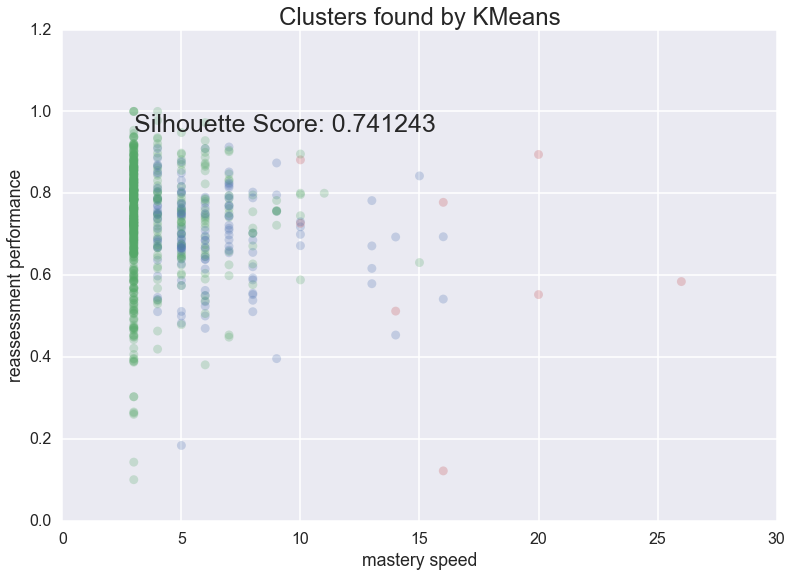

In [10]:
labels_k1 = plot_clusters(data[:,1:], data, cluster.KMeans, (), {'n_clusters':2})

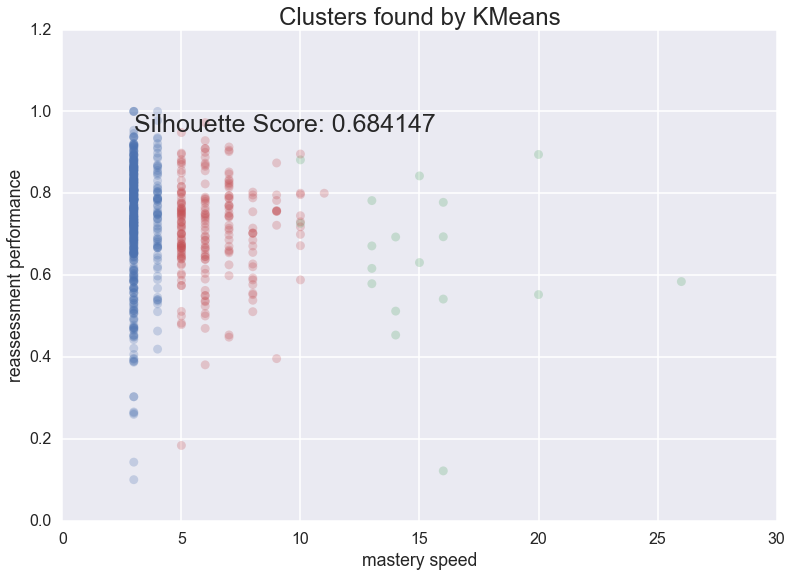

In [22]:
labels_k2 = plot_clusters(data[:,:], data, cluster.KMeans, (), {'n_clusters': 2})

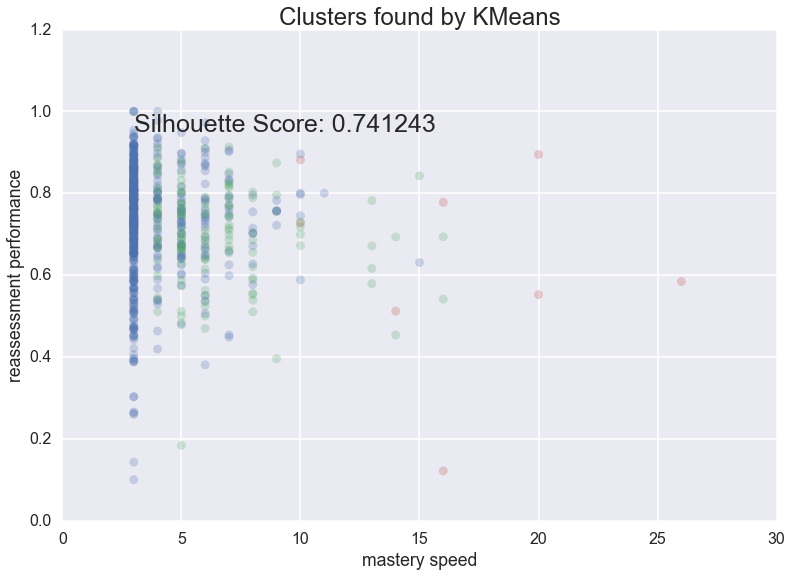

In [26]:
labels_k2 = plot_clusters(data[:,1:], data, cluster.KMeans, (), {'n_clusters': 3})

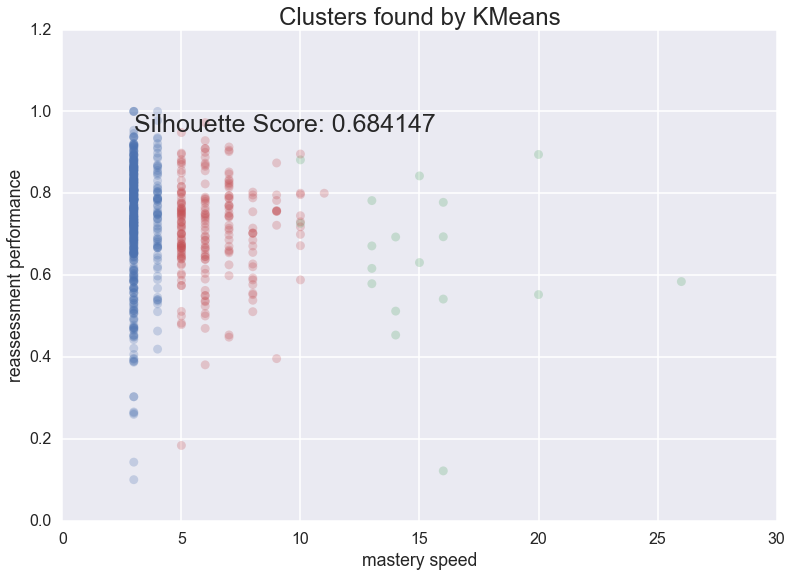

In [27]:
labels_k2 = plot_clusters(data[:,:], data, cluster.KMeans, (), {'n_clusters': 3})

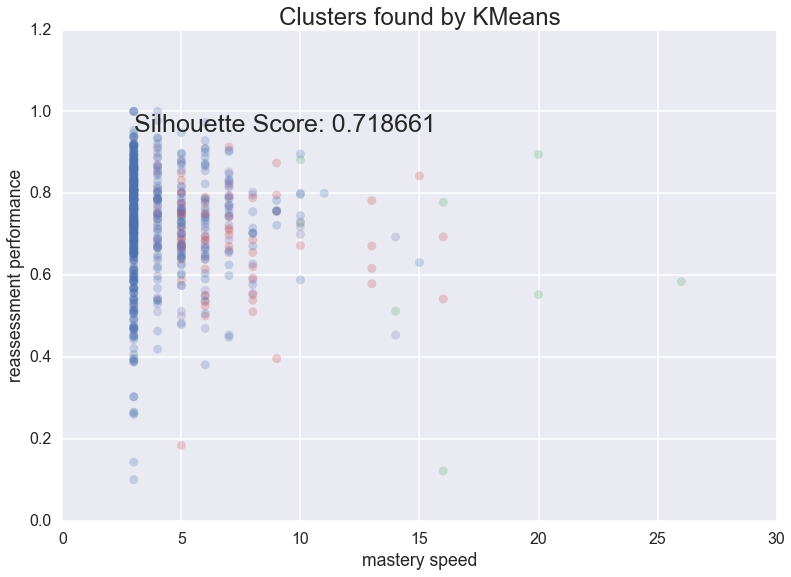

In [28]:
labels_k2 = plot_clusters(data[:,1:], data, cluster.KMeans, (), {'n_clusters': 4})

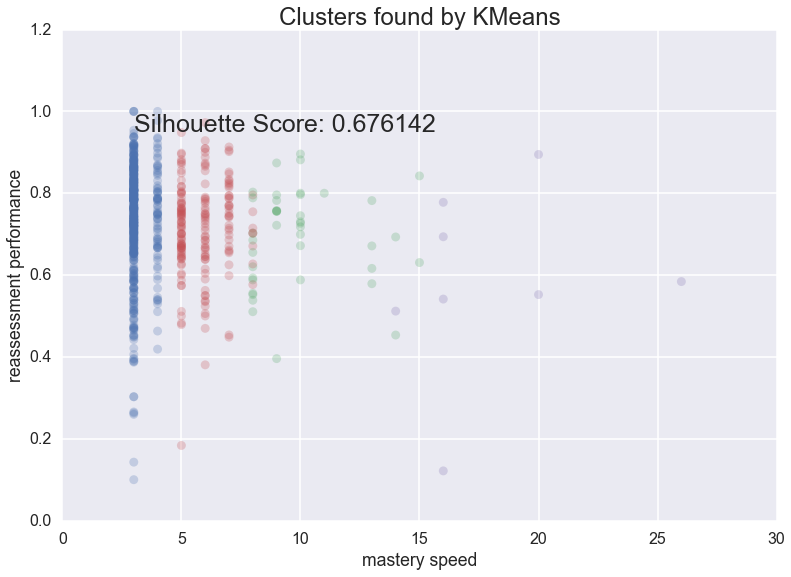

In [29]:
labels_k2 = plot_clusters(data[:,:], data, cluster.KMeans, (), {'n_clusters': 4})

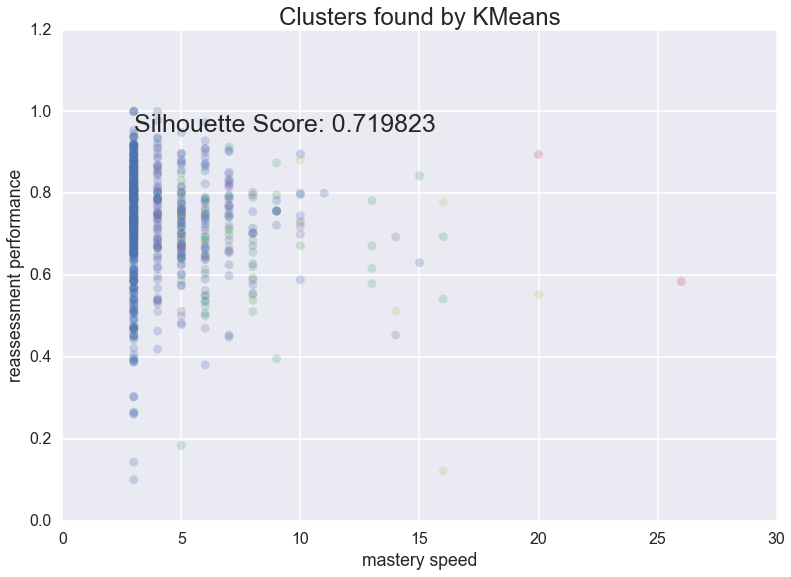

In [30]:
labels_k2 = plot_clusters(data[:,1:], data, cluster.KMeans, (), {'n_clusters': 5})

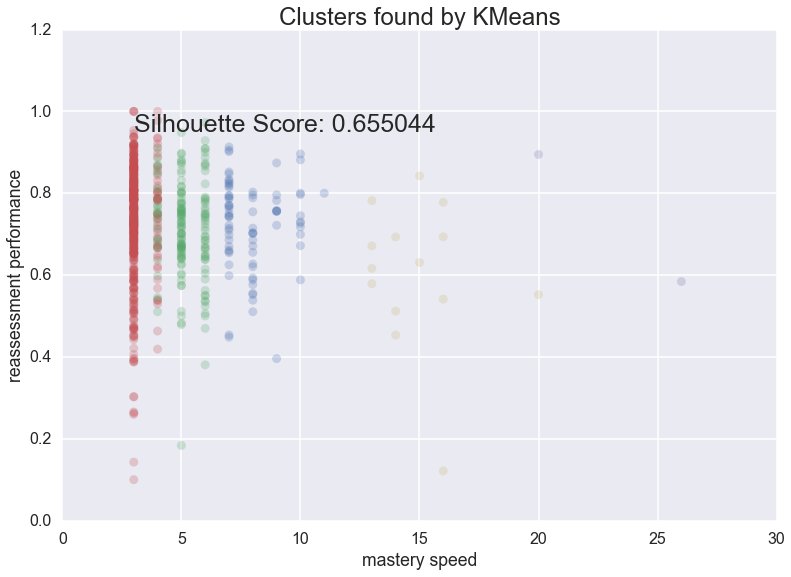

In [32]:
labels_k2 = plot_clusters(data[:,:], data, cluster.KMeans, (), {'n_clusters': 5})

In [ ]:
labels_k2 = plot_clusters(data[:,:], data, cluster.KMeans, (), {'n_clusters': 6})

In [12]:
# plot_clusters(data, cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.95})

In [13]:
# labels_s1 = plot_clusters(data[:,1:], data, cluster.SpectralClustering, (), {'n_clusters': n_clusters})

In [14]:
# labels_s2 = plot_clusters(data[:,:], data, cluster.SpectralClustering, (), {'n_clusters': n_clusters})

In [15]:
# plot_clusters(data[:,1:], data, cluster.AgglomerativeClustering, (), {'n_clusters':n_clusters, 'linkage':'ward'})

In [16]:
# plot_clusters(data[:,1:], data, cluster.DBSCAN, (), {'eps':0.025})

In [17]:
# plot_clusters(data[:,1:], data, hdbscan.HDBSCAN, (), {'min_cluster_size':15})

In [18]:
output_path = r'local_data/label_%d.csv' % s_id
output_file = open(output_path, 'wb')

In [19]:
writer = csv.writer(output_file)
writer.writerow(['l1', 'l2'])

In [20]:
for i in range(len(labels_k1)):
    writer.writerow([labels_k1[i], labels_k2[i]])

In [21]:
output_file.close()